<img src="Capture.jpg">

### Let's see how many Hash Functions we need to create in order to maintain a given false positive error rate...###

In [1]:
# import numpy to perform logarithmic actions
import numpy as np

# the number of slots in the filter
n = 100

# the false positive error rate
p = 0.05 #false positive rate, from 0.0 to 1.0

# bits in the bloom filter
m = int(round((-n*np.log(p)) / (0.48045)))

# hash functions required not to go above the allowed error rate
k = m/n * np.log(2)

print("Number of bits for bloom filter:", m)
print('This is the number of hash functions I should create:',round(k))

Number of bits for bloom filter: 624
This is the number of hash functions I should create: 4.0


### 1. Create the hash functions (or use existing libraries) ###

In [2]:
# initialize an array of 0s that has m spots
array = [0] * m

# create a list to be hashed and addressed in the array

lst=[8,9,17]


def hash1(self):
    '''
    This function will return the address/position of the element.
    Input: element to be hashed.
    Output: element's address.
    '''
    # this is the first hash function
    position = ((3*self)+3)%len(array) 
    return position

def hash2(self):
    '''
    This function will return the address/position of the element.
    Input: element to be hashed.
    Output: element's address.
    '''
    # this is the second hash function
    position = ((6*self)+9**2)%len(array)
    return position

def hash3 (self):
    '''
    This function will return the address/position of the element.
    Input: element to be hashed.
    Output: element's address.
    '''
    # this is the third hash function
    position = ((3*self)+7**3)%len(array)
    return position

def hash4 (self):
    '''
    This function will return the address/position of the element.
    Input: element to be hashed.
    Output: element's address.
    '''
    # this is the fourth hash function
    position = ((2*self)+3**4)%len(array)
    return position

### I chose the give these hash functions for open addressing, because ###
### they populate the array to some extent randomly  and uniformly (although it ###
### is a deterministic process), and that way it minimizes collisions. ###

### It's important to minimize collisions to keep the minimum space usage ###
### in terms of bits, because the higher the number in the array, the more bits used. ###
### An ideal array would be one with only 1 and 0s. ###


### 2. Insert(element) operation ###

In [3]:
def insert(lst):
    '''
    This function takes the elements of a list, hashes them from
    all the four hash functions to find their positions, and then
    places the element as 1 in the array. If there are collisions,
    the element 1 is incremented by one. 
    Input: List
    Output: A counting bloom filter
    '''
    # initialize storages for hashed elements from the list
    hashone = []
    hashtwo = []
    hashthree = []
    hashfour = []
    
    # append the hashed elements in the appropriate list
    for self in lst:
        hashone.append(hash1(self))
        hashtwo.append(hash2(self))
        hashthree.append(hash3(self))
        hashfour.append(hash4(self))
        
    # Hashed elements only represent the position in the array
    # and they will be stored as one in that position 
    # (or more, if there are collisions)
    for i in hashone:
        array[i] += 1
    for i in hashtwo:
        array[i] += 1
    for i in hashthree:
        array[i] += 1
    for i in hashfour:
        array[i] += 1
        
    return array

print(insert(lst))

### I choose to insert a list because it is easier ###
### to populate the array for the given task. ###
### However, we could create the function to only insert ###
### an element instead. In this task, we would have to call ### 
### the function for every element in the list, so I decided ###
### to insert the whole list simultaneously instead. ###


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### 3. Query(element) operation

In [4]:
def lookup(element, array):
    '''
    This function looks up for one element if it 
    was part of the first list we put in the CBF.
    This might return False Positives up to 5%, but never
    False Negatives.
    Input: element, array
    Output: a boolean that says the element is or is not in the list.
    '''
    # hash the element to find its possible addresses
    a = hash1(element)
    b = hash2(element)
    c = hash3(element)
    d = hash4(element)
    
    # if all the addresses are more than 0, then the element might be there
    if array[a]>0 and array[b]>0 and array[c]>0 and array[d]>0:
        return True
        
    # if one of the addresses is 0, then the element is not there for sure
    if array[a]==0 or array[b]==0 or array[c]==0 or array[d]==0:
        return False

lookup(1,array)

False

### 4. Delete(element) operation ###

In [5]:
def deletion(element, array):
        '''
        This function deletes an element from the array.
        Input: The element, array
        Output: A list without the element given
        '''
        # hash the element to find its addresses
        a = hash1(element)
        b = hash2(element)
        c = hash3(element)
        d = hash4(element)
        
        # delete it from those addresses
        array[a]-=1
        array[b]-=1
        array[c]-=1
        array[d]-=1
        return array

print(deletion(8,array))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Experimental results of False Positives###

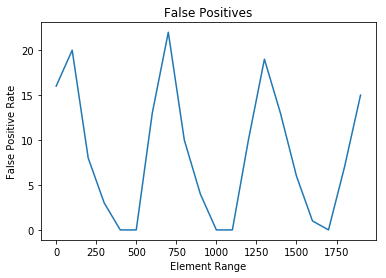

Average FPR: 8.35


In [9]:
import random
n = 100

# the false positive error rate
p = 0.05 # false positive rate, from 0.0 to 1.0

# bits in the bloom filter
m = int(round((-n*np.log(p)) / (0.48045)))

# hash functions required not to go above the allowed error rate
k = m/n * np.log(2) # round(k) = 4

testset = [i*100 for i in range(20)]
resultset = []
for sz in testset:
    array = [0] * m

    my_random_list = list(range(sz-100,sz))
    not_my_random_list = list(range(sz+1,sz+100))
    insert(my_random_list)

    count = 0

    for i in not_my_random_list:
        if lookup(i, array) == True:
            count+=1
    resultset.append(count)
    
# importing the required module 
import matplotlib.pyplot as plt 
  
x, y = testset, resultset
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Element Range') 
# naming the y axis 
plt.ylabel('False Positive Rate') 
  
# giving a title to my graph 
plt.title('False Positives') 
  
# function to show the plot 
plt.show() 

print("Average FPR:", sum(resultset)/len(resultset))

In [7]:
n = 200

# the false positive error rate
p = 0.05 # false positive rate, from 0.0 to 1.0

# bits in the bloom filter
m = int(round((-n*np.log(p)) / (0.48045)))

# hash functions required not to go above the allowed error rate
k = m/n * np.log(2) # round(k) = 4

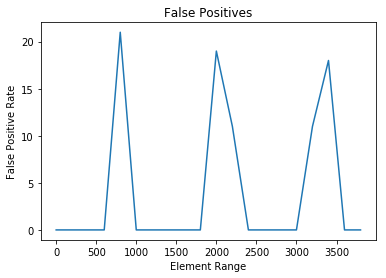

Average FPR: 4.0


In [8]:
testset = [i*200 for i in range(20)]
resultset = []
for sz in testset:
    array = [0] * m

    my_random_list = list(range(sz-200,sz))
    not_my_random_list = list(range(sz+1,sz+200))
    insert(my_random_list)

    count = 0

    for i in not_my_random_list:
        if lookup(i, array) == True:
            count+=1
    resultset.append(count)
    
# importing the required module 
import matplotlib.pyplot as plt 
  
x, y = testset, resultset
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Element Range') 
# naming the y axis 
plt.ylabel('False Positive Rate') 
  
# giving a title to my graph 
plt.title('False Positives') 
  
# function to show the plot 
plt.show() 

print("Average FPR:", sum(resultset)/len(resultset))

In the beggining of the notebook, you can see that we have set the False Positive Rate to 5%. When taking a list of 100 elements the FPR is 8.35% (from the first graph), whereas taking 200 elements at once the FPR rate is 4% (the second graph). The way we conduct this experiment is by choosing a list of 100 elements to be inserted, and we create another list of 100 elements which are not part of the first list. Then, we check how many times does the counting bloom filter return the element as being in the list (while we do know for sure the element is not in the list).

_The findings:_ 

1. The bigger the number of elements in the list, the smaller the error rate. However, that requires more space (in bits) to accomodate every element without causing many collisions.

2. Theoretically we expect the error rate to be 5%, according to the formula. However, we see that that changes depending on the number of the elements. It also matters how normally are the elements distributed. In both cases we have a pretty uniform distribution (see range), but altering the code to insert no replacement may reduce the false positive error rate, as we avoid collisions. 



**Memory size as a function of the false-positive rate:**

From the formula we see that the negative value of the numbers of items to be stored is multiplied by the logarithmic false positive rate, which has a direct relationship with the memory size (a growth in memory is associated with a growth in FPR). 


$m = (-n*log(p)) / (0.48045)$

**Memory size as a function of the number of items stored:**

Similarly, there is a direct relationship between memory size and items stored, except that the items stored has a negative value. In this case a growth in memory size, is associated with lowering increasing n, but negatively.


$m = (-n*log(p)) / (0.48045)$

**Access time as a function of the false-positive rate**

It depends on the time k-hash functions and the final bloom filter. The algorithm is very space-efficient and looks up very fast. The smaller the final bloom filter, the more chances for high false positive rates. Therefore, some extra space is used to reduce the false positive rates.

**Access time as a function of the number of items stored**



The bloom filter has a set size, that's why we decide priorly how many items do we want to store so that we can create a filter with optimal bits. If the number of list exceeds, then the positive false rates will also exceed. B